In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import kpss, adfuller
from scipy.stats import boxcox


In [119]:
train = pd.DataFrame(pd.read_csv('data/dataset_lab3_train.csv')[['meantemp', 'date']])
test = pd.DataFrame(pd.read_csv('data/dataset_lab3_test.csv')[['meantemp', 'date']])

In [120]:
train.date = pd.to_datetime(train.date)
test.date = pd.to_datetime(test.date)

In [121]:
train.set_index('date', inplace=True)
test.set_index('date', inplace=True)

In [122]:
train = train.resample('ME').mean()
test = test.resample('ME').mean()

In [123]:
test

,meantemp
date,
2017-01-31,15.710873
2017-02-28,18.349981
2017-03-31,23.753760
2017-04-30,30.753663


In [124]:
def three_plot(data, figsize=(30,10)):
    fig, axes = plt.subplots(3, 1)
    plt.rcParams.update({'figure.figsize': figsize, 'figure.dpi': 90})
    axes[0].plot(data)
    plot_acf(data, ax=axes[1])
    plot_pacf(data, ax=axes[2])
    plt.plot()


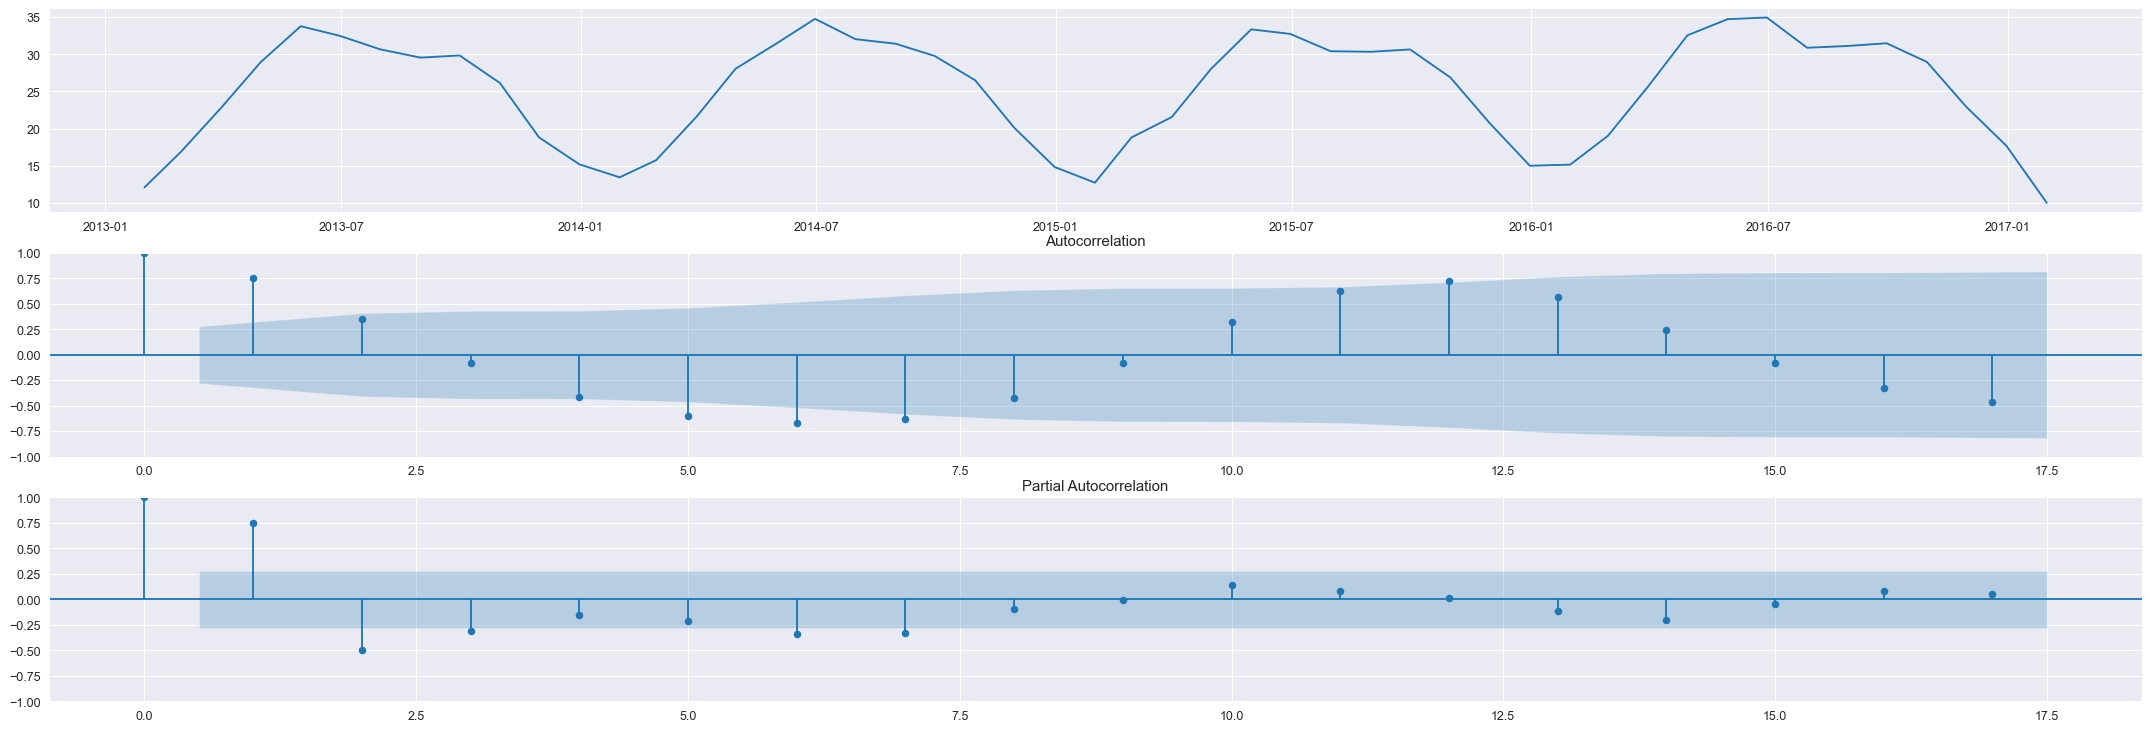

In [125]:
three_plot(train)

In [126]:
def stationary_test(data):
    p_value = adfuller(data)[1]
    is_stat = p_value > 0.05
    print(f'pvalue: {p_value} -> {"stationary" if is_stat else "non stationary"}')
    print(adfuller(data))
    return is_stat

pvalue: 0.8373097533459751 -> stationary
(-0.735606892615406, 0.8373097533459751, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 109.427690660211)


True

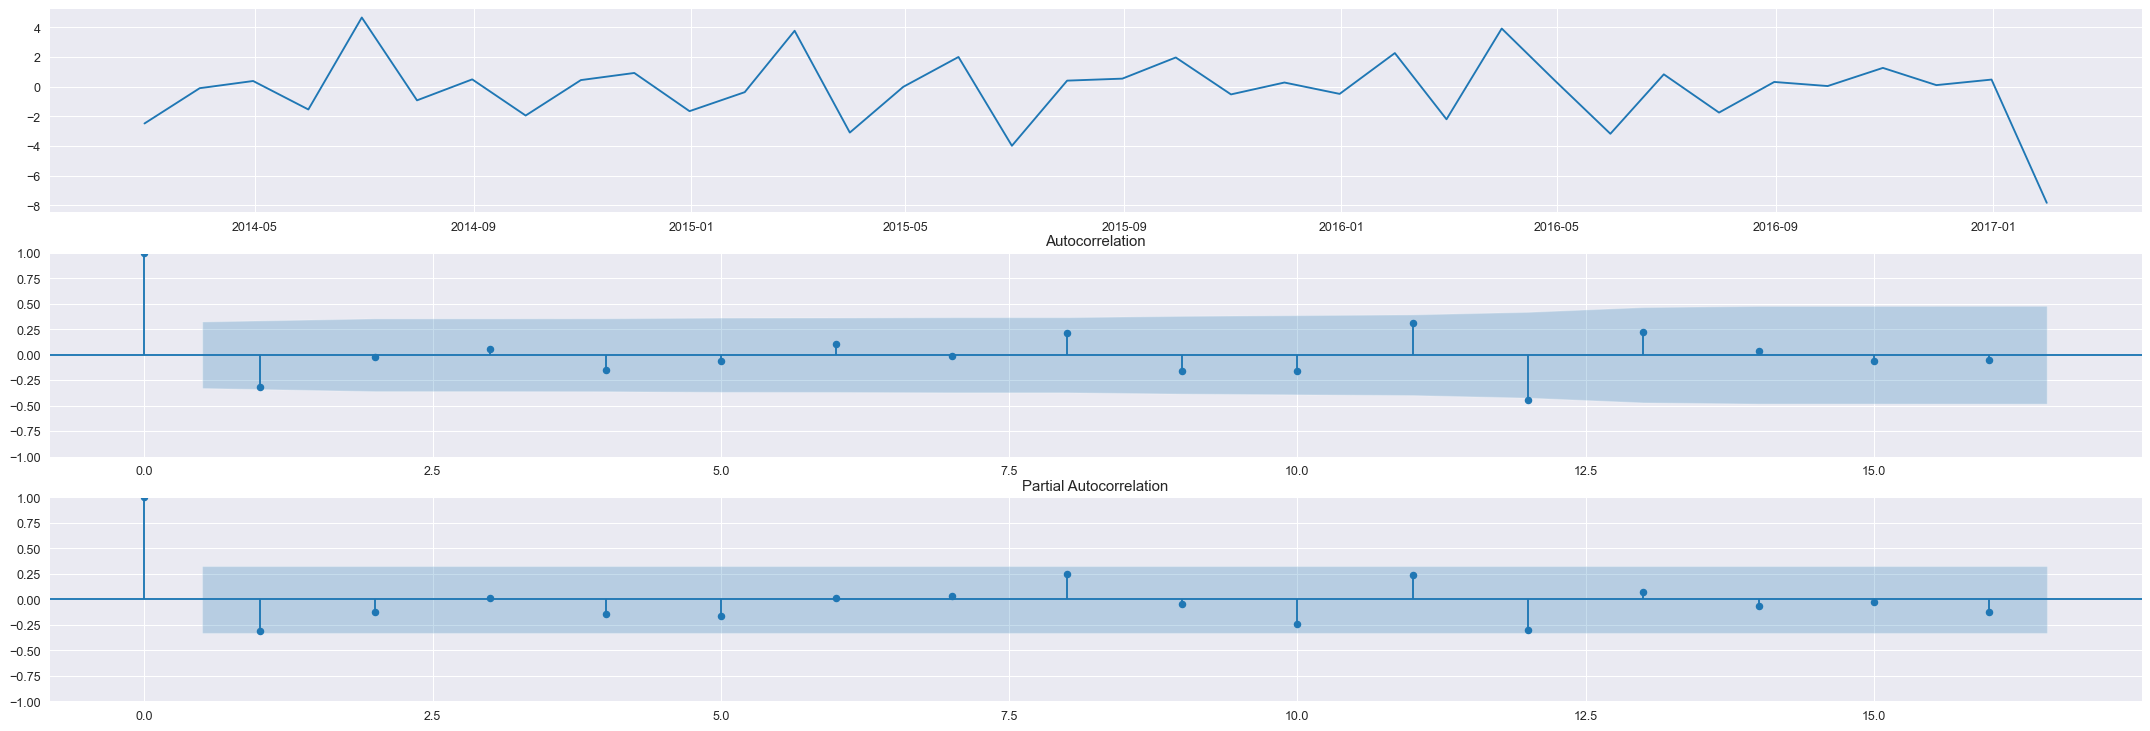

In [127]:
cox, _ = boxcox(train.meantemp)
cox = pd.DataFrame(cox)
diff_one = diff(train.meantemp, k_seasonal_diff=1, seasonal_periods=12)
three_plot(diff_one)
stationary_test(diff_one)
# print(f'pvalue: {p_value} -> {"stationary" if p_value < 0.05 else "non stationary"}')

In [128]:
arima = ARIMA(train, order=(7, 0 ,7), seasonal_order=(0, 1, 1, 12)).fit()

D:\python\DataProcessingLabs\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\python\DataProcessingLabs\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\python\DataProcessingLabs\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
D:\python\DataProcessingLabs\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
preds = arima.predict(train.index[0], train.index[-1])
forecast = arima.forecast(10)

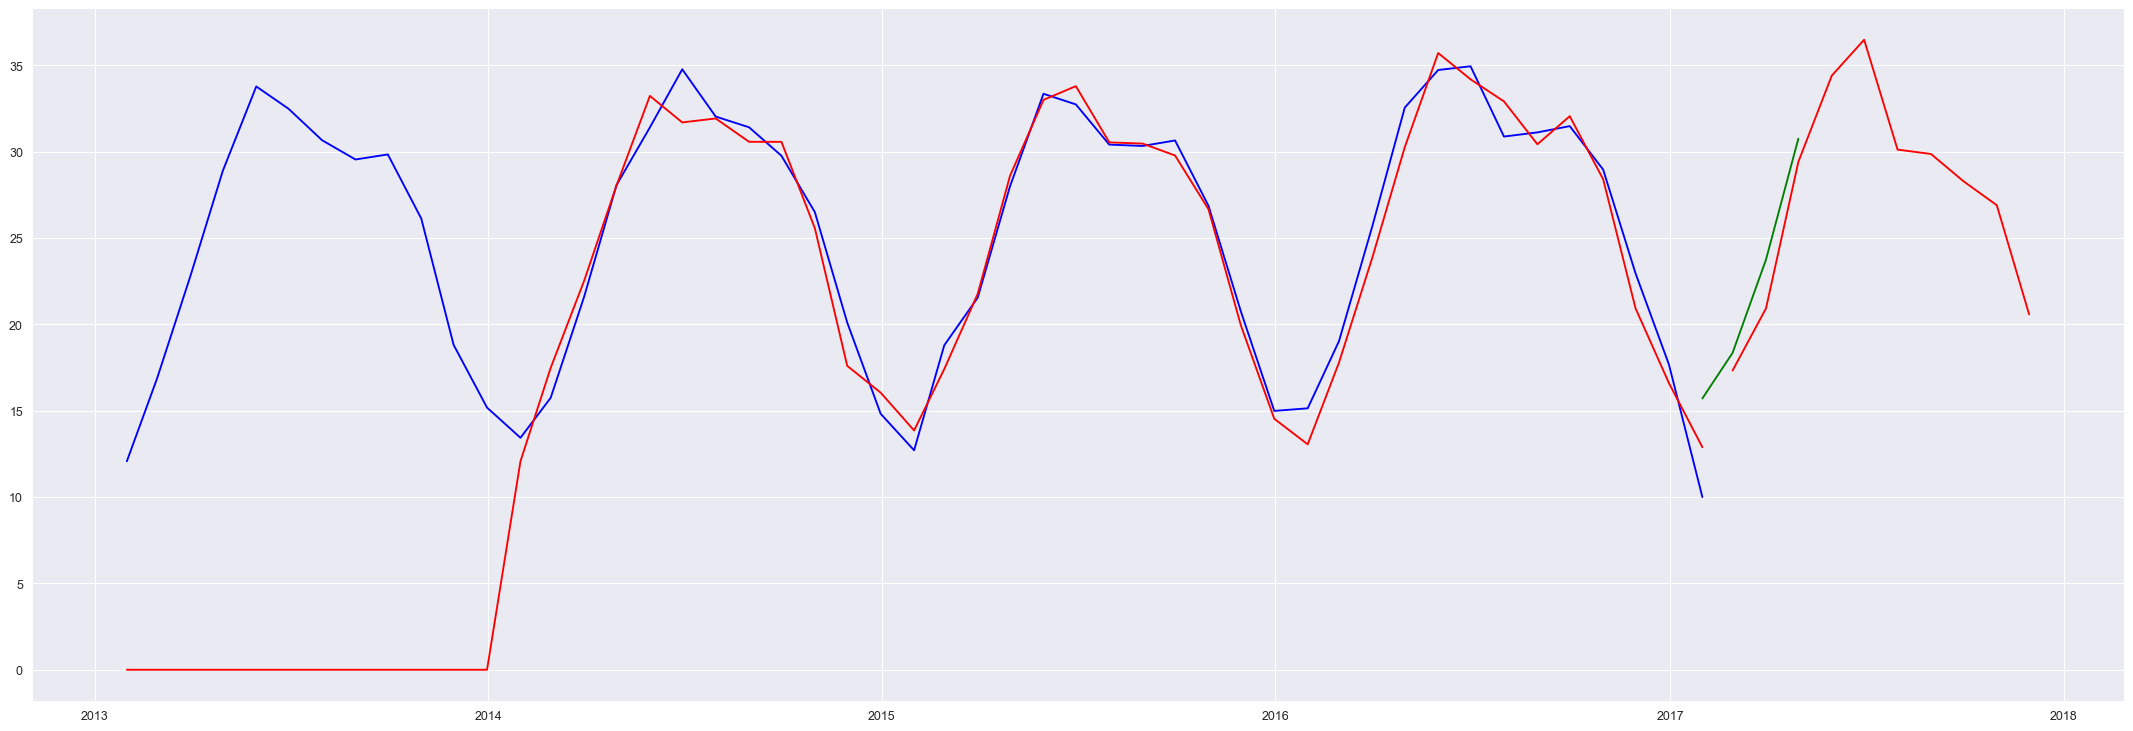

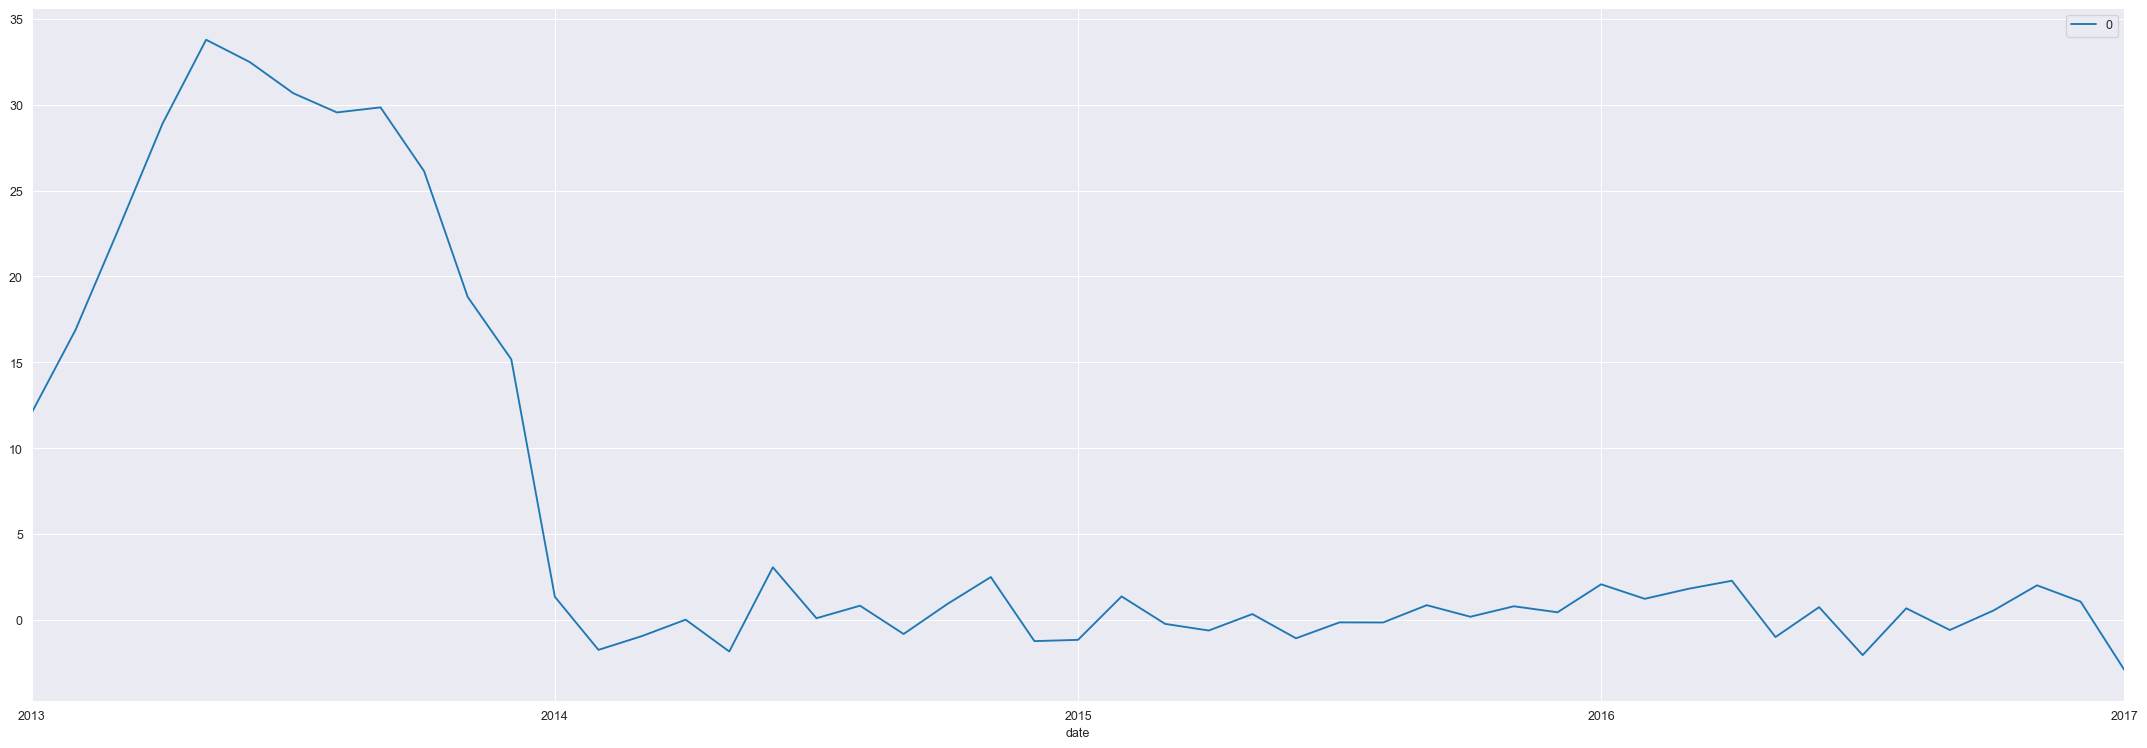

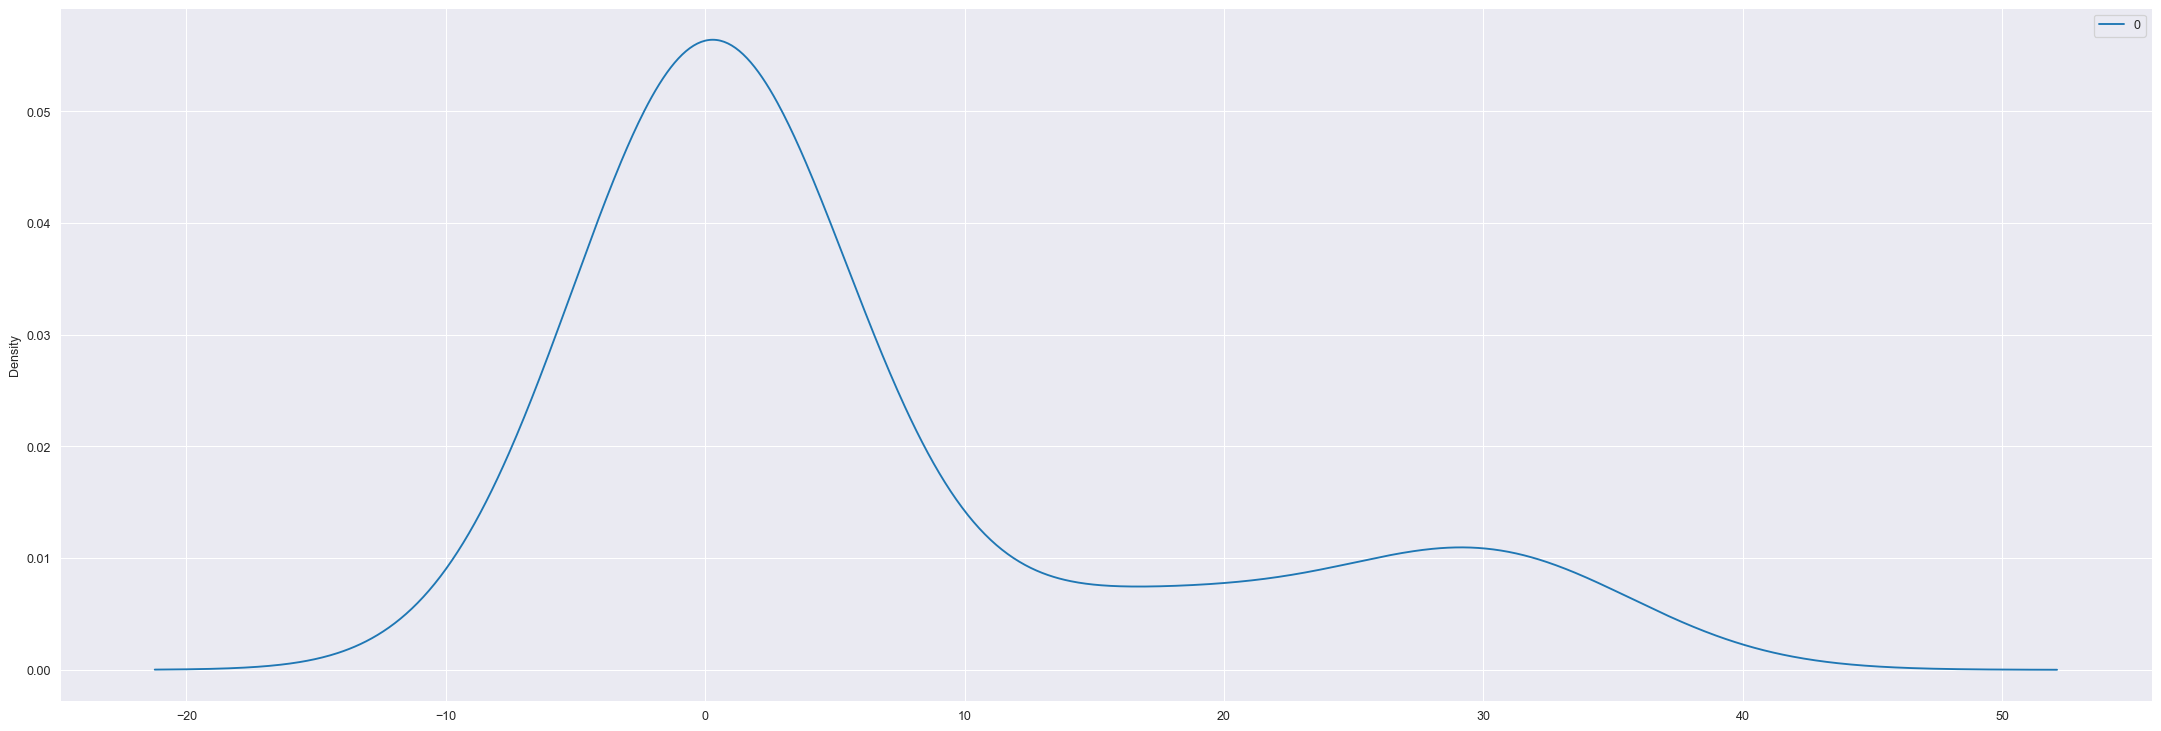

In [130]:
plt.plot(train, color='blue', label='Train')
plt.plot(test, color='green', label='Test')
plt.plot(preds, color='red', label='Preds')
plt.plot(forecast, color='red', label='Forecast')
plt.show()

# line plot of residuals
residuals = pd.DataFrame(arima.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
